<a href="https://colab.research.google.com/github/StuartLiv/CPSC-440-Project/blob/main/models/unified_boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Set up file
Load libraries, Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from google.colab import userdata

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/StuartLiv/CPSC-440-Project
%pwd

Cloning into 'CPSC-440-Project'...
remote: Enumerating objects: 166750, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 166750 (delta 177), reused 285 (delta 151), pack-reused 166415
Receiving objects: 100% (166750/166750), 843.23 MiB | 24.70 MiB/s, done.
Resolving deltas: 100% (37136/37136), done.
Updating files: 100% (249508/249508), done.


'/content'

Load stored decoder from full size model training, and fix decoder parameters.

In [3]:
rgb_color_output_diffs = torch.load('/content/CPSC-440-Project/models/RGB/mssim_scores/color_output_diffs')
rgb_color_input_diffs = torch.load('/content/CPSC-440-Project/models/RGB/mssim_scores/color_input_diffs.npy')
rgb_bw_output_diffs = torch.load('/content/CPSC-440-Project/models/RGB/mssim_scores/bw_output_diffs.npy')
rgb_bw_input_diffs = torch.load('/content/CPSC-440-Project/models/RGB/mssim_scores/bw_input_diffs.npy')

rgb_ntl_color_output_diffs = torch.load('/content/CPSC-440-Project/models/RGB/mssim_scores/ntl_color_output_diffs')
rgb_ntl_bw_output_diffs = torch.load('/content/CPSC-440-Project/models/RGB/mssim_scores/ntl_bw_output_diffs')

lab_color_output_diffs = torch.load('/content/CPSC-440-Project/models/LAB/mssim_scores/color_output_diffs')
lab_color_input_diffs = torch.load('/content/CPSC-440-Project/models/LAB/mssim_scores/color_input_diffs.npy')
lab_bw_output_diffs = torch.load('/content/CPSC-440-Project/models/LAB/mssim_scores/bw_output_diffs.npy')
lab_bw_input_diffs = torch.load('/content/CPSC-440-Project/models/LAB/mssim_scores/bw_input_diffs.npy')

lab_ntl_color_output_diffs = torch.load('/content/CPSC-440-Project/models/LAB/mssim_scores/ntl_color_output_diffs')
lab_ntl_bw_output_diffs = torch.load('/content/CPSC-440-Project/models/LAB/mssim_scores/ntl_bw_output_diffs')

# Boxplots

In [5]:
dim_labels = [32,64,128,256]
plt.style.use('ggplot')

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)

    plt.setp(plot_name['fliers'], marker='.', markersize=8)
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend(fontsize=8)

def double_plot(t1, t2, label, cat1, cat2):
    plot1 = plt.boxplot(np.transpose(t1.numpy()),
                             positions = np.array(np.arange(len(label)))*2.0-0.35, widths=0.6)
    plot2 = plt.boxplot(np.transpose(t2.numpy()),
                             positions = np.array(np.arange(len(label)))*2.0+0.35, widths=0.6)
    plt.xticks(np.arange(0, len(label) * 2, 2), label)

    define_box_properties(plot1, '#D7191C', cat1)
    define_box_properties(plot2, '#2C7BB6', cat2)

def quadruple_plot(t1, t2, t3, t4, label, cat1, cat2, cat3, cat4):
    plot1 = plt.boxplot(np.transpose(t1.numpy()),
                             positions = np.array(np.arange(len(label)))*4.0-1.05, widths=0.6)
    plot2 = plt.boxplot(np.transpose(t2.numpy()),
                             positions = np.array(np.arange(len(label)))*4.0-0.35, widths=0.6)
    plot3 = plt.boxplot(np.transpose(t3.numpy()),
                             positions = np.array(np.arange(len(label)))*4.0+0.35, widths=0.6)
    plot4 = plt.boxplot(np.transpose(t4.numpy()),
                             positions = np.array(np.arange(len(label)))*4.0+1.05, widths=0.6)


    plt.xticks(np.arange(0, len(label) * 4, 4), label)

    define_box_properties(plot1, '#D7191C', cat1)
    define_box_properties(plot2, '#2C7BB6', cat2)
    define_box_properties(plot3, '#9C090C', cat3)
    define_box_properties(plot4, '#1E4E7F', cat4)

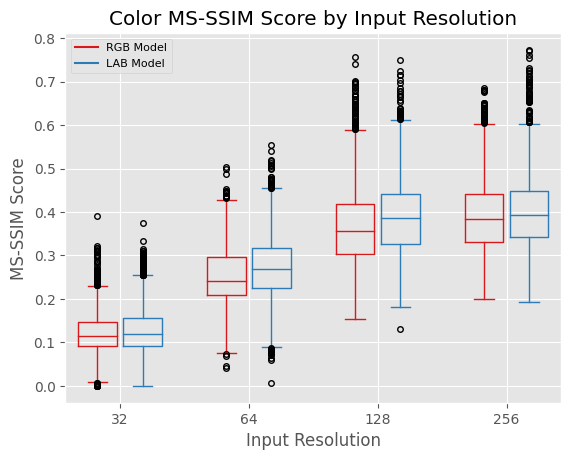

In [ ]:
double_plot(rgb_color_output_diffs, lab_color_output_diffs, dim_labels, 'RGB Model', 'LAB Model')

plt.ylabel("MS-SSIM Score", )
plt.xlabel("Input Resolution")
plt.title("Color MS-SSIM Score by Input Resolution")

plt.show()

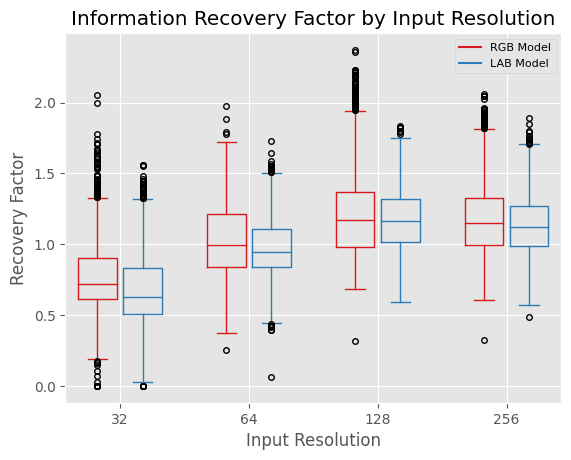

In [ ]:
rgb_recovery_factor = torch.div(rgb_color_output_diffs, rgb_color_input_diffs)
lab_recovery_factor = torch.div(lab_color_output_diffs, lab_color_input_diffs)

double_plot(rgb_recovery_factor, lab_recovery_factor, dim_labels, 'RGB Model', 'LAB Model')

plt.ylabel("Recovery Factor")
plt.xlabel("Input Resolution")
plt.title("Information Recovery Factor by Input Resolution")

plt.show()

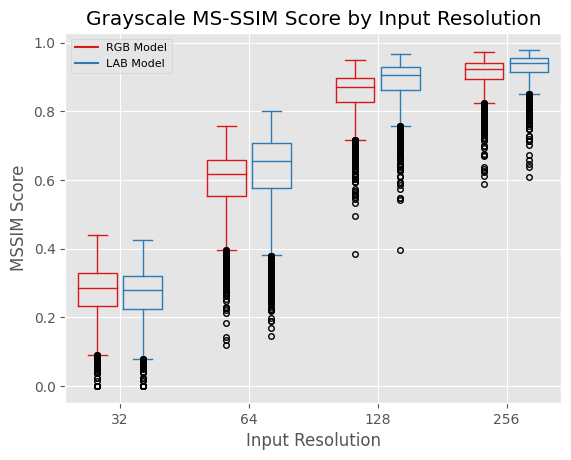

In [6]:
double_plot(rgb_bw_output_diffs, lab_bw_output_diffs, dim_labels, 'RGB Model', 'LAB Model')

plt.ylabel("MSSIM Score")
plt.xlabel("Input Resolution")
plt.title("Grayscale MS-SSIM Score by Input Resolution")

plt.show()

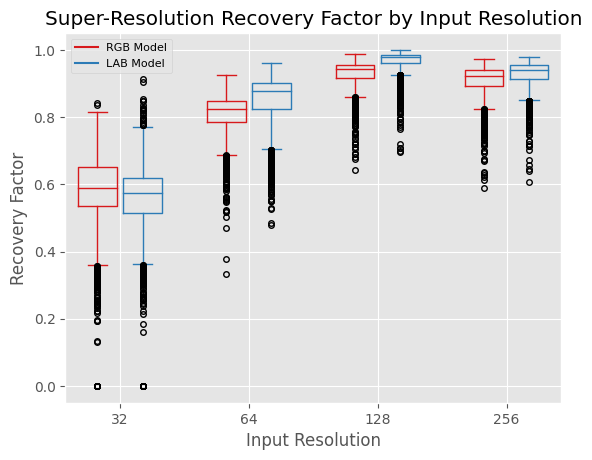

In [ ]:
rgb_bw_recovery_factor = torch.div(rgb_bw_output_diffs, rgb_bw_input_diffs)
lab_bw_recovery_factor = torch.div(lab_bw_output_diffs, lab_bw_input_diffs)

double_plot(rgb_bw_recovery_factor, lab_bw_recovery_factor, dim_labels, 'RGB Model', 'LAB Model')

plt.ylabel("Recovery Factor")
plt.xlabel("Input Resolution")
plt.title("Super-Resolution Recovery Factor by Input Resolution")

plt.show()

## Non-Transfer Learning Model Comparisons

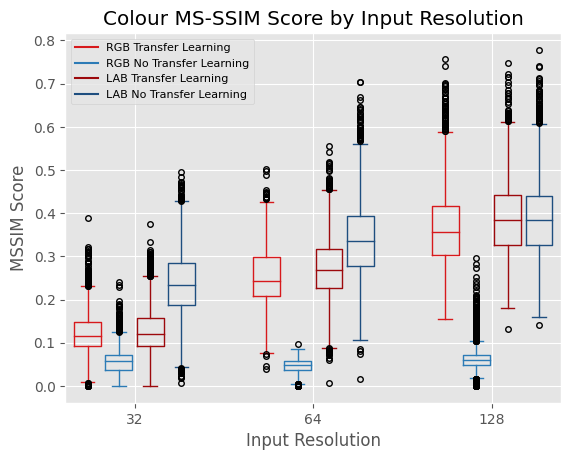

In [7]:
quadruple_plot(rgb_color_output_diffs[0:3], rgb_ntl_color_output_diffs, lab_color_output_diffs[0:3], lab_ntl_color_output_diffs, dim_labels[0:3],
               'RGB Transfer Learning', 'RGB No Transfer Learning', 'LAB Transfer Learning', 'LAB No Transfer Learning')

plt.ylabel("MSSIM Score")
plt.xlabel("Input Resolution")
plt.title("Colour MS-SSIM Score by Input Resolution")

plt.show()

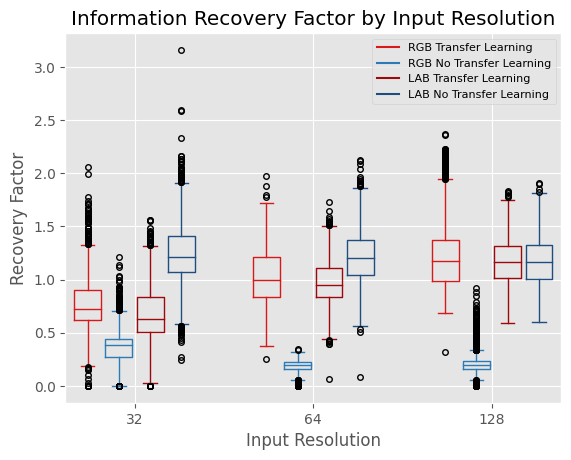

In [ ]:
rgb_ntl_recovery_factor = torch.div(rgb_ntl_color_output_diffs, rgb_color_input_diffs[0:3])
lab_ntl_recovery_factor = torch.div(lab_ntl_color_output_diffs, lab_color_input_diffs[0:3])

quadruple_plot(rgb_recovery_factor[0:3], rgb_ntl_recovery_factor, lab_recovery_factor[0:3], lab_ntl_recovery_factor, dim_labels[0:3],
               'RGB Transfer Learning', 'RGB No Transfer Learning', 'LAB Transfer Learning', 'LAB No Transfer Learning')

plt.ylabel("Recovery Factor")
plt.xlabel("Input Resolution")
plt.title("Information Recovery Factor by Input Resolution")

plt.show()

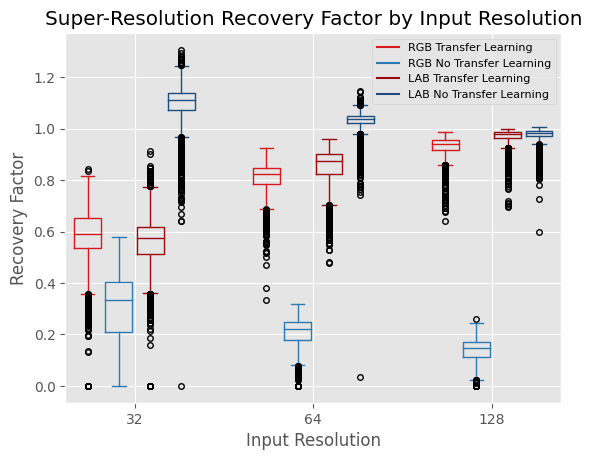

In [ ]:
rgb_ntl_bw_recovery_factor = torch.div(rgb_ntl_bw_output_diffs, rgb_bw_input_diffs[0:3])
lab_ntl_bw_recovery_factor = torch.div(lab_ntl_bw_output_diffs, lab_bw_input_diffs[0:3])

quadruple_plot(rgb_bw_recovery_factor[0:3], rgb_ntl_bw_recovery_factor, lab_bw_recovery_factor[0:3], lab_ntl_bw_recovery_factor, dim_labels[0:3],
               'RGB Transfer Learning', 'RGB No Transfer Learning', 'LAB Transfer Learning', 'LAB No Transfer Learning')

plt.legend(loc='upper right', fontsize=8)
plt.ylabel("Recovery Factor")
plt.xlabel("Input Resolution")
plt.title("Super-Resolution Recovery Factor by Input Resolution")

plt.show()

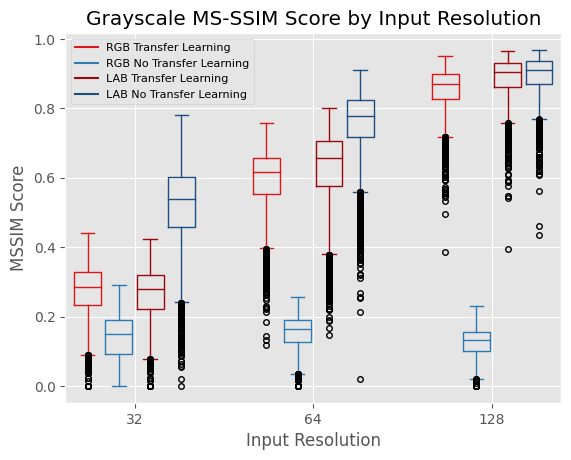

In [8]:
quadruple_plot(rgb_bw_output_diffs[0:3], rgb_ntl_bw_output_diffs, lab_bw_output_diffs[0:3], lab_ntl_bw_output_diffs,
               dim_labels[0:3], 'RGB Transfer Learning', 'RGB No Transfer Learning', 'LAB Transfer Learning', 'LAB No Transfer Learning')

plt.ylabel("MSSIM Score")
plt.xlabel("Input Resolution")
plt.title("Grayscale MS-SSIM Score by Input Resolution")

plt.show()
